In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder

In [2]:
coca = pd.read_excel("E:\\ExcelR\\Assingment\\Assignment 18\\CocaCola_Sales_Rawdata.xlsx")
coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


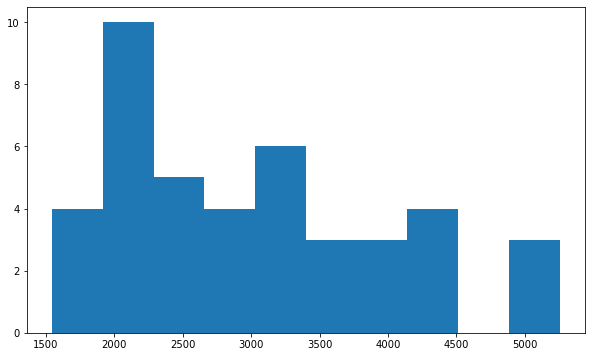

In [4]:
plt.figure(figsize = (10,6))
plt.hist(coca["Sales"])
plt.show()

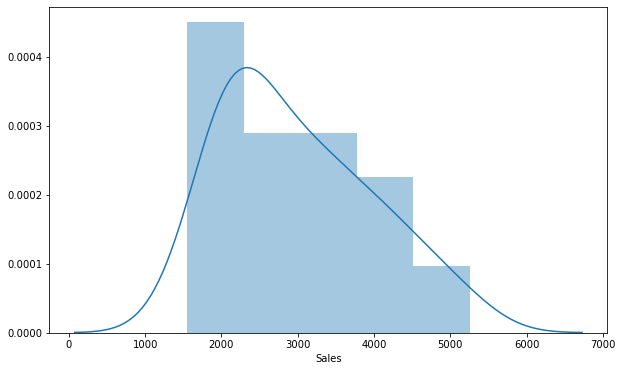

In [5]:
plt.figure(figsize = (10,6))
sns.distplot(coca["Sales"])
plt.show()

In [6]:
coca_dummy = pd.get_dummies(coca["Quarter"])
coca_dummy.head()

,Q1_86,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,Q1_94,Q1_95,...,Q4_86,Q4_87,Q4_88,Q4_89,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


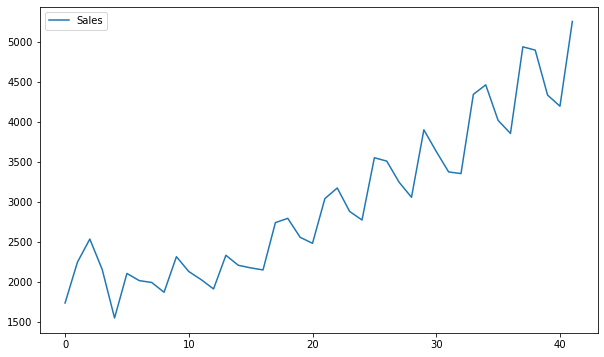

In [7]:
coca.plot(figsize = (10,6))
plt.show()

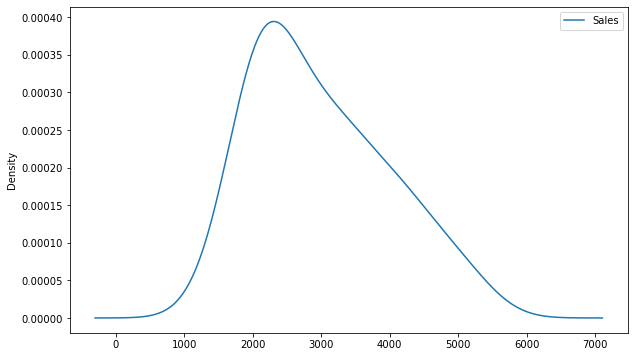

In [8]:
coca.plot(kind='kde', figsize = (10,6))
plt.show()

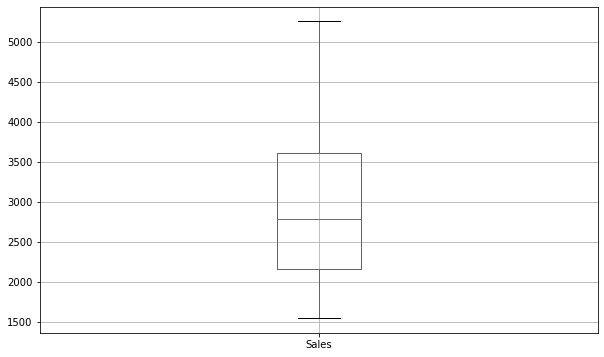

In [9]:
coca.boxplot(figsize = (10,6))
plt.show()

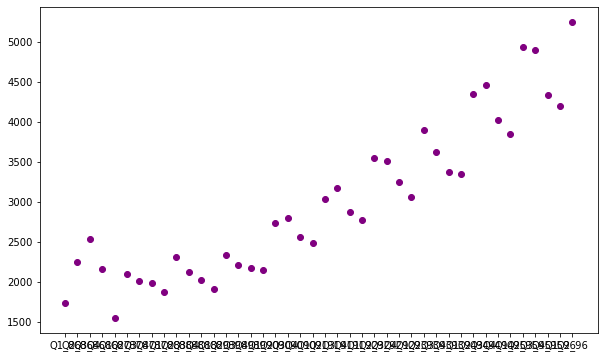

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(x = coca["Quarter"], y = coca["Sales"], c = "purple")
plt.show()

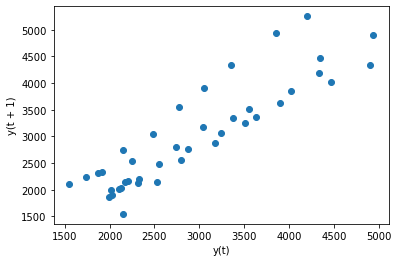

In [11]:
lag_plot = lag_plot(coca.Sales)

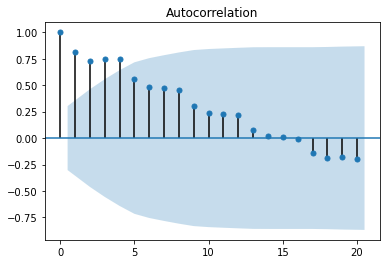

In [12]:
acf_plot = plot_acf(coca.Sales, lags = 20)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


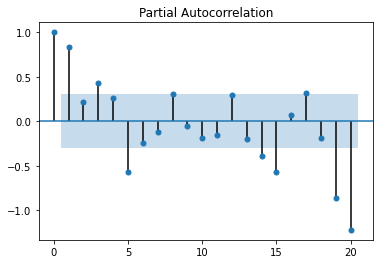

In [13]:
pacf_plot = plot_pacf(coca.Sales, lags = 20)

In [14]:
coca.Sales.mean()

2994.353307723999

In [15]:
coca.Sales.mode()

0     1547.818996
1     1734.827000
2     1869.049999
3     1910.603996
4     1991.746998
5     2014.362999
6     2026.828999
7     2104.411995
8     2128.320000
9     2148.278000
10    2154.962997
11    2173.967995
12    2206.549995
13    2244.960999
14    2313.631996
15    2331.164993
16    2480.973999
17    2533.804993
18    2556.009995
19    2739.307999
20    2772.000000
21    2792.753998
22    2879.000999
23    3039.522995
24    3056.000000
25    3172.115997
26    3243.859993
27    3352.000000
28    3373.000000
29    3508.000000
30    3550.000000
31    3629.000000
32    3854.000000
33    3899.000000
34    4017.000000
35    4194.000000
36    4333.000000
37    4342.000000
38    4461.000000
39    4895.000000
40    4936.000000
41    5253.000000
dtype: float64

In [16]:
coca.Sales.median()

2782.376998901367

In [17]:
coca = coca.apply(LabelEncoder().fit_transform)

In [18]:
model = smf.ols("Quarter~Sales", data = coca).fit()
model.params

Intercept    13.717608
Sales         0.330848
dtype: float64

In [19]:
print(model.pvalues)

Intercept    0.000404
Sales        0.032346
dtype: float64


In [20]:
print(model.tvalues)

Intercept    3.860348
Sales        2.217341
dtype: float64


In [21]:
print(model.rsquared)

0.10946065818486561


In [22]:
print(model.rsquared_adj)

0.08719717463948728


In [23]:
coca.corr()

,Quarter,Sales
Quarter,1.000000,0.330848
Sales,0.330848,1.000000
